In [1]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import patsy

In [2]:
# Loading data from datasets
df_capes = pd.read_csv("CapesCleanedEnrolled.csv")
df_income = pd.read_csv("income_dataset.csv")
df_capes

,Unnamed: 0,Instructor,Department,Rcmnd Instr,Average Grade Expected,Classes Taught,Enrolled
0,0,"Ben-Yosef, Erez",Anthropology,100.000000,3.6400,1.0,19.0
1,1,"D'Alpoim Guedes, Jade A",Anthropology,100.000000,3.7500,1.0,39.0
2,2,"Marchetto, Maria Carolina",Anthropology,100.000000,3.9100,1.0,25.0
3,3,"Non, Amy L",Anthropology,90.966667,3.2800,3.0,91.0
4,4,"Lew, Caroline Horton",Anthropology,88.100000,3.6850,2.0,72.0
...,...,...,...,...,...,...,...
1534,1534,"Pafunda, Danielle",Literature,98.075000,3.8075,4.0,139.0
1535,1535,"Johnson, Sara E.",Literature,97.200000,3.6900,1.0,45.0
1536,1536,"Morse, Ainsley",Literature,100.000000,3.7000,2.0,30.0
1537,1537,"Kokotovic, Milos",Literature,100.000000,3.7550,2.0,43.0


In [3]:
# Standardizing the strings in order to combine 
def last_name(string):
    end = string.find(',')
    return string[0:end].upper()

def first_name(string):
    start = string.find(',')
    name = string[start+2:].upper()
    space = name.find(' ')
    if (space != -1):
        return name[:space+2]
    return name

def uppercase(string):
    return string.upper()

def first_name_income(string):
    name = string.upper()
    space = name.find(' ')
    if (space != -1):
        return name[:space+2]
    return name

In [4]:
# Standardizing Capes Set
df_capes['Last Name'] = df_capes['Instructor'].apply(last_name)
df_capes['First Name'] = df_capes['Instructor'].apply(first_name)
df_capes['Instructor'] = df_capes['Last Name'] + ', ' + df_capes['First Name']

# Standardizing Income Set
df_income['First Name'] = df_income['First Name'].apply(first_name_income)
df_income['Instructor'] = df_income['Last Name'] + ', ' + df_income['First Name']

In [5]:
# Merge datasets and get rid of merge columns
df = df_income.merge(df_capes, on=['Instructor'])
df = df.drop(['Unnamed: 0_x', 'Last Name_x', 'First Name_x', 'Instructor', 'Unnamed: 0_y', 'Last Name_y', 'First Name_y'], axis=1)
df

,Title,Regular Pay,Department,Rcmnd Instr,Average Grade Expected,Classes Taught,Enrolled
0,LECTURER - ACADEMIC YEAR,40000.0,Electrical & Computer Eng.,95.120000,3.802000,5.0,196.0
1,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,10000.0,Psychology,97.000000,3.250000,1.0,52.0
2,LECTURER - ACADEMIC YEAR - CONTINUING,50000.0,Chemistry,90.575000,3.115000,4.0,1356.0
3,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,20000.0,Mathematics,90.450000,3.350000,2.0,491.0
4,LECTURER - ACADEMIC YEAR - CONTINUING,130000.0,Education Studies,97.900000,3.980000,1.0,55.0
...,...,...,...,...,...,...,...
1030,PROF - ACADEMIC YEAR - B/E/E,200000.0,Rady School of Management,82.200000,3.810000,1.0,52.0
1031,ASST PROF - ACADEMIC YEAR,100000.0,Chemistry,92.300000,3.125000,2.0,513.0
1032,VIS ASSOC PROF,140000.0,Rady School of Management,91.216667,3.546667,6.0,401.0
1033,PROF - ACADEMIC YEAR,140000.0,Mathematics,96.150000,3.210000,2.0,43.0


# Data Analysis

NormaltestResult(statistic=260.59041805666146, pvalue=2.59125229989609e-57)


(array([509., 202., 153.,  83.,  48.,  22.,  13.,   3.,   1.,   1.]),
 array([  2000.,  42800.,  83600., 124400., 165200., 206000., 246800.,
        287600., 328400., 369200., 410000.]),
 <a list of 10 Patch objects>)

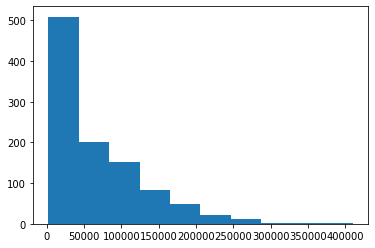

In [6]:
df['pay'] = df['Regular Pay']/df['Classes Taught']
##df['Log pay'] = df['Log pay'].apply(np.log10)
print(normaltest(df['pay'].values))

plt.hist(df['pay'])

In [7]:
grades = df.sort_values(by=['Average Grade Expected'])['Average Grade Expected']
grades.reset_index(drop=True, inplace=True)
middle = int(grades.size/2)
dividingGrades = grades[middle]

In [9]:
lowerGrades = []
upperGrades = []

for i in df.index:
    totalPay = df.loc[i, 'pay']
    classes = df.loc[i, 'Classes Taught']
    grade = df.loc[i, 'Average Grade Expected']
    
    pay = totalPay
    
    if grade < dividingGrades:
        lowerGrades.append(pay)
        
    else:
        upperGrades.append(pay)
    

In [10]:
sumLower = 0
sumUpper = 0

for i in lowerGrades:
    sumLower += i
    
for i in upperGrades:
    sumUpper += i

averageLower = sumLower/len(lowerGrades)
averageUpper = sumUpper/len(upperGrades)

print(averageLower, averageUpper)

74341.94450037472 54555.46936471794


In [11]:
print(normaltest(lowerGrades))
print(normaltest(upperGrades))

NormaltestResult(statistic=86.04857251059705, pvalue=2.064381181626232e-19)
NormaltestResult(statistic=201.08241427862455, pvalue=2.1652524341683121e-44)


In [12]:
ttest_ind(lowerGrades, upperGrades)

Ttest_indResult(statistic=5.096758255601589, pvalue=4.1071741922665143e-07)

In [ ]:
rcmnd = df.sort_values(by=['Rcmnd Instr'])['Rcmnd Instr']
rcmnd.reset_index(drop=True, inplace=True)
middle = int(len(rcmnd)/2)
dividingRcmnd = rcmnd[middle]



In [ ]:
lowerRcmnd = []
upperRcmnd = []

for i in df.index:
    totalPay = df.loc[i, 'Regular Pay']
    classes = df.loc[i, 'Classes Taught']
    rec = df.loc[i, 'Rcmnd Instr']
    
    pay = totalPay/classes
    
    if rec < dividingRcmnd:
        lowerRcmnd.append(pay)
        
    else:
        upperRcmnd.append(pay)

In [ ]:
print(len(lowerRcmnd))
print(len(upperRcmnd))

In [ ]:
sumLower = 0
sumUpper = 0

for i in lowerRcmnd:
    sumLower += i
    
for i in upperRcmnd:
    sumUpper += i

averageLower = sumLower/len(lowerRcmnd)
averageUpper = sumUpper/len(upperRcmnd)

print(averageLower, averageUpper)


In [ ]:
print(normaltest(lowerRcmnd))
print(normaltest(upperRcmnd))

In [ ]:
ttest_ind(lowerRcmnd, upperRcmnd)